In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, norm
import pymc as pm

In [2]:
model = pm.Model()

data = np.array([1] * 6 + [0] * 4)
with model:
    p = pm.Beta("p", alpha=9, beta=3) # a priori
    X = pm.Bernoulli("x", p=p, observed=data) # likelihood
    # similar, using Binomial distribution
    # X = pm.Binomial("X", n=data.shape[0], p=p, observed=data.sum())

    # a posteriori estimates
    # MAP estimate
    point = pm.find_MAP()
    
    # MCMC trace
    trace = pm.sample()

Output()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


0.09711986067435269


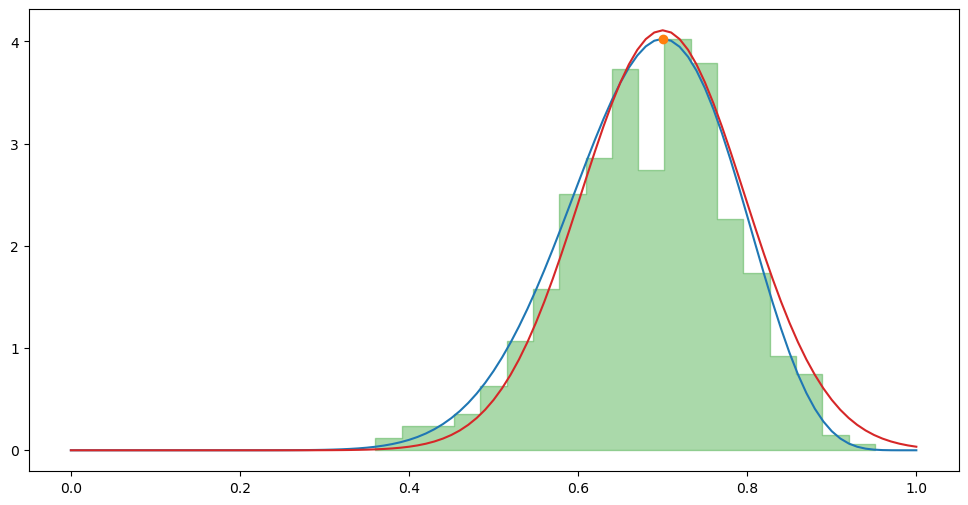

In [3]:
np_trace = trace["posterior"]["p"].to_numpy()
cnt_bins = 20

plt.figure(figsize=(12, 6))
a = 9
b = 3

a += 6
b += 4
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C0", label=rf"$Beta(\alpha={a}, \beta={b})$")


plt.plot(
    [point["p"]],
    [beta.pdf(point["p"], a, b)],
    "o",
    label=f"MAP = {point["p"]:.4f}",
    color="C1",
)

# for k in range(np_trace.shape[0]):
for k in range(1):
    counts, bins = np.histogram(np_trace[k], bins=cnt_bins)
    plt.fill_between(
        bins[1:],
        counts / counts.max() * y.max(),
        step="pre",
        alpha=0.4,
        color=f"C{2 + k}",
        label="MCMC",
    )

std = ((a * b) / ((a + b + 1) * (a + b) ** 2)) ** 0.5
print(std)

x = np.arange(0, 1.01, 0.01)
y = norm.pdf(x, 0.7, std)
plt.plot(x, y, color=f"C{3 + k}", label=rf"$\approx N(\mu={0.7}, \sigma={std:.3f})$")

# plt.xlabel("x", fontsize=18)
# plt.ylabel("p(x)", fontsize=18)
# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)
# plt.legend(fontsize=18)
# plt.grid()


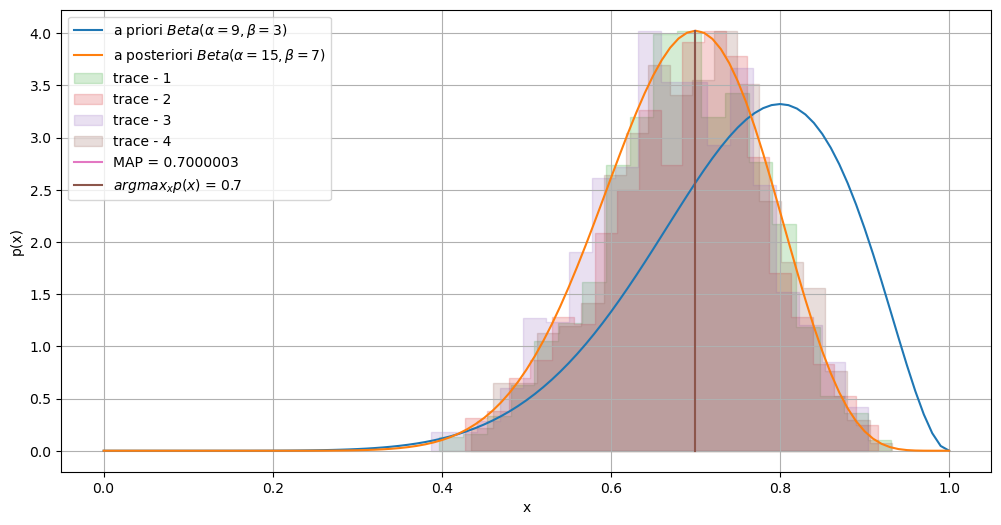

In [3]:
np_trace = trace["posterior"]["p"].to_numpy()
cnt_bins = 20

plt.figure(figsize=(12, 6))
a = 9
b = 3
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C0", label=rf"a priori $Beta(\alpha={a}, \beta={b})$")

a += 6
b += 4
x = np.arange(0, 1.01, 0.01)
y = beta.pdf(x, a, b)
plt.plot(x, y, color="C1", label=rf"a posteriori $Beta(\alpha={a}, \beta={b})$")

for k in range(np_trace.shape[0]):
    counts, bins = np.histogram(np_trace[k], bins=cnt_bins)
    plt.fill_between(
        bins[1:],
        counts / counts.max() * y.max(),
        step="pre",
        alpha=0.2,
        color=f"C{2 + k}",
        label=f"trace - {k + 1}",
    )

plt.plot(
    [point["p"], point["p"]],
    [0, beta.pdf(point["p"], a, b)],
    label=f"MAP = {point["p"]:.7f}",
    color=f"C{2 + k + 1}",
)

mode = (a - 1) / (a + b - 2)
plt.plot(
    [mode, mode],
    [0, beta.pdf(mode, a, b)],
    label=fr"$argmax_x p(x)$ = {mode}",
    color=f"C{2 + k}",
)

plt.xlabel("x")
plt.ylabel("p(x)")
plt.grid()
plt.legend()
